In [7]:
# Install dulu kalau belum
!pip install pandas textblob

from textblob import TextBlob
import pandas as pd

In [2]:
import pandas as pd
df = pd.read_csv('data.csv')

df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
import os
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:

# Drop NA and duplicates
df = df.dropna(subset=['Sentence', 'Sentiment']).drop_duplicates()

# Enhanced stopwords list
stop_words = set(stopwords.words('english') + [
    # Financial/tech terms that don't carry sentiment
    'eur', 'mn', 'mln', 'usd', 'sek', 'hel', 'q1', 'q2', 'q3', 'q4',
    'nyse', 'nasdaq', 'omx', 'stocks', 'shares', 'company', 'group',
    'corp', 'inc', 'ltd', 'plc', 'oyj', 'ab', 'pct', 'percent',
    'million', 'billion', 'contract', 'agreement', 'said', 'year',
    'net', 'sales', 'profit', 'operating', 'result', 'financial',
    'quarter', 'period', 'according', 'would', 'also', 'could',
    # General stopwords
    'the', 'a', 'an', 'and', 'but', 'if', 'or', 'as', 'of', 'at',
    'by', 'for', 'with', 'to', 'from', 'in', 'on', 'that', 'this',
    'these', 'those', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
    'will', 'would', 'should', 'can', 'could', 'may', 'might', 'must',
    'about', 'above', 'below', 'into', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where',
    'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
    'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'don',
    'now', 'd', 't', 'https'
])

def clean_text(text):
    words = word_tokenize(text.lower())
    # Hanya hapus stopwords, angka & simbol tetap
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['Sentence'] = df['Sentence'].apply(clean_text)

In [11]:
df

,Sentence,Sentiment
0,geosolutions technology leverage benefon 's gp...,positive
1,"$ esi lows , $ 1.50 $ 2.50 bk real possibility",negative
2,"last 2010 , componenta 's doubled eur131m eur7...",positive
3,"finnish-russian chamber commerce , major const...",neutral
4,swedish buyout firm sold remaining 22.4 stake ...,neutral
...,...,...
5837,rising costs forced packaging producer huhtama...,negative
5838,nordic walking first used summer training meth...,neutral
5839,"shipping viking line , eu decision significant...",neutral
5840,"building home improvement trade , decreased 22...",neutral


In [12]:
sentiment_column = 'Sentiment'  # Replace with the actual column name in your dataset

# Check the unique values in the sentiment column to confirm the presence of 'neutral'
print("Unique sentiment labels before filtering:", df[sentiment_column].unique())

# Drop rows where sentiment is 'neutral'
df1 = df[df[sentiment_column] != 'neutral']

# Display the first few rows of the filtered DataFrame
print("Dataset after dropping the 'neutral' class:")
df1

Unique sentiment labels before filtering: ['positive' 'negative' 'neutral']
Dataset after dropping the 'neutral' class:


,Sentence,Sentiment
0,geosolutions technology leverage benefon 's gp...,positive
1,"$ esi lows , $ 1.50 $ 2.50 bk real possibility",negative
2,"last 2010 , componenta 's doubled eur131m eur7...",positive
5,$ spy n't surprised see green close,positive
6,shell 's $ 70 bg deal meets shareholder skepti...,negative
...,...,...
5832,fell 38.1 55.3 2007 .,negative
5835,hsbc says unit book $ 585 charge settlement,negative
5836,daily mail parent talks potential partners joi...,positive
5837,rising costs forced packaging producer huhtama...,negative


svm

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.8561643835616438
              precision    recall  f1-score   support

           0       0.94      0.55      0.70        87
           1       0.84      0.99      0.91       205

    accuracy                           0.86       292
   macro avg       0.89      0.77      0.80       292
weighted avg       0.87      0.86      0.84       292



In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
y_pred = nb_model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.8493150684931506
              precision    recall  f1-score   support

           0       0.91      0.55      0.69        87
           1       0.84      0.98      0.90       205

    accuracy                           0.85       292
   macro avg       0.87      0.76      0.79       292
weighted avg       0.86      0.85      0.84       292



RANDOMFOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_tweet'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.8698630136986302
              precision    recall  f1-score   support

           0       0.85      0.67      0.75        85
           1       0.88      0.95      0.91       207

    accuracy                           0.87       292
   macro avg       0.86      0.81      0.83       292
weighted avg       0.87      0.87      0.86       292



deeplearning

In [8]:
import pandas as pd
df = pd.read_csv('data.csv')
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


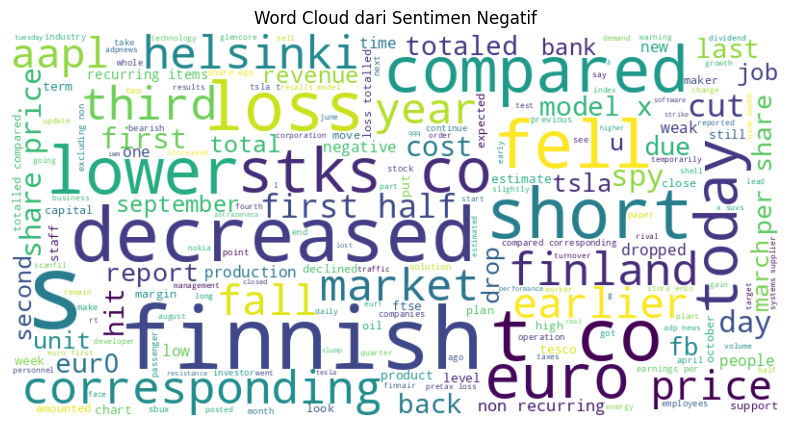

In [13]:
df_negatif = df[df['Sentiment'] == 'negative']

# Gabungkan semua teks kalimat negatif
all_words_negatif = ' '.join(df_negatif['Sentence'])

# Buat Word Cloud
wordcloud_negatif = WordCloud(
    width=800, height=400,
    background_color='white',
    random_state=21,
    max_font_size=110
).generate(all_words_negatif)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud dari Sentimen Negatif')
plt.show()

eda

Class distribution:
Sentiment
neutral     3124
positive    1852
negative     860
Name: count, dtype: int64

Text length stats:
count    5836.000000
mean       84.206991
std        44.230974
min         4.000000
25%        51.000000
50%        75.000000
75%       110.000000
max       315.000000
Name: text_length, dtype: float64


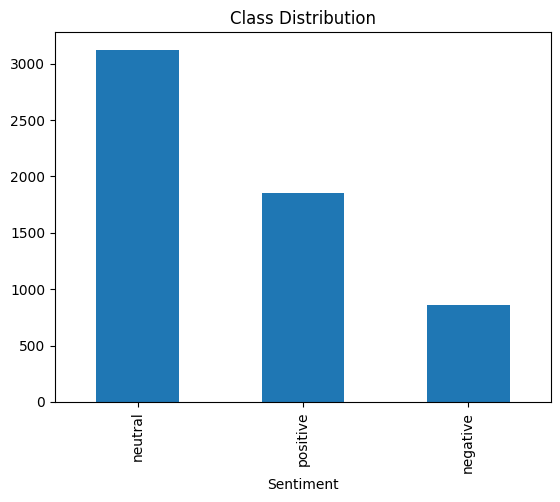

In [14]:
def perform_eda(data):
    # Check class distribution
    print("Class distribution:")
    print(df['Sentiment'].value_counts())

    # Text length analysis
    df['text_length'] = df['Sentence'].apply(len)
    print("\nText length stats:")
    print(df['text_length'].describe())

    # Visualize class distribution
    df['Sentiment'].value_counts().plot(kind='bar', title="Class Distribution")
    plt.show()
perform_eda(df)

Class distribution:
Sentiment
neutral     3124
positive    1852
negative     860
Name: count, dtype: int64

Text length stats:
count    5836.000000
mean       84.206991
std        44.230974
min         4.000000
25%        51.000000
50%        75.000000
75%       110.000000
max       315.000000
Name: text_length, dtype: float64


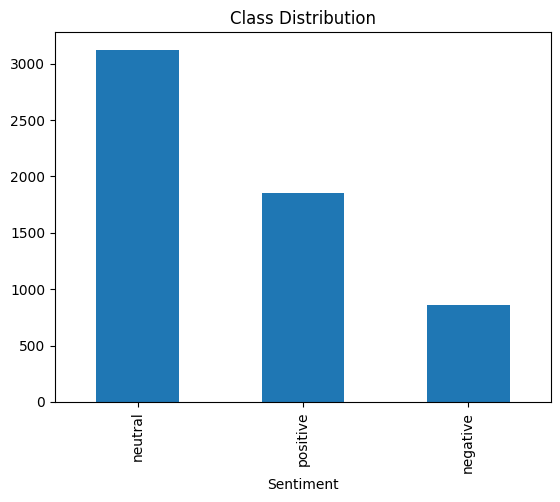

In [15]:
def perform_eda(data):
    # Check class distribution
    print("Class distribution:")
    print(df['Sentiment'].value_counts())

    # Text length analysis
    df['text_length'] = df['Sentence'].apply(len)
    print("\nText length stats:")
    print(df['text_length'].describe())

    # Visualize class distribution
    df['Sentiment'].value_counts().plot(kind='bar', title="Class Distribution")
    plt.show()
perform_eda(df)

ekstraksi fitur

In [5]:
!pip install tensorflow

In [6]:
#LSTM
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Label encoding: positive=1, negative=0
df['label'] = df['Sentiment'].map({'positive': 1, 'negative': 0, 'neutral': 2})

X = df['Sentence'].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


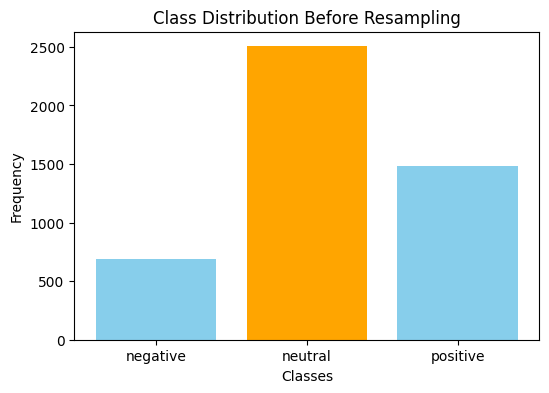

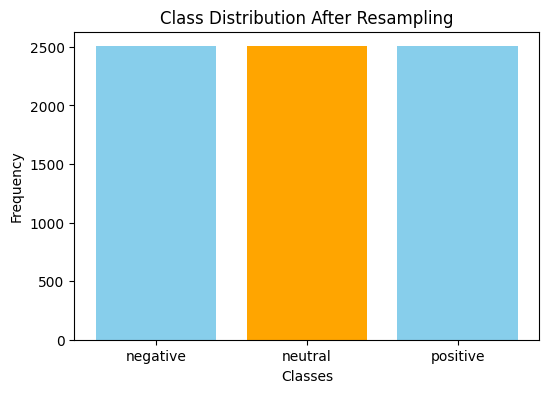

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming your dataset has 'cleaned_text' and 'Sentiment' columns
X = df['Sentence']
y = df['Sentiment']

# Encode the labels (Positive, Negative -> 1, 0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Convert training text to numerical features (e.g., TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Visualize class distribution before resampling
def plot_class_distribution(y_data, title, labels):
    counts = Counter(y_data)
    plt.figure(figsize=(6, 4))
    plt.bar(counts.keys(), counts.values(), color=['skyblue', 'orange'])
    plt.xticks(ticks=range(len(labels)), labels=labels)
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Frequency')
    plt.show()

# Plot before resampling
plot_class_distribution(y_train, "Class Distribution Before Resampling", labels=label_encoder.classes_)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Plot after resampling
plot_class_distribution(y_train_resampled, "Class Distribution After Resampling", labels=label_encoder.classes_)

# Transform the test set using the same TF-IDF vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Using device: cpu


Epoch 1: Loss: 0.8511, Acc: 55.03%, Val Loss: 0.5750, Val Acc: 76.57%


Epoch 2: Loss: 0.4209, Acc: 83.69%, Val Loss: 0.5340, Val Acc: 81.04%


Epoch 3: Loss: 0.2926, Acc: 88.96%, Val Loss: 0.5808, Val Acc: 80.56%


Epoch 4: Loss: 0.2302, Acc: 90.51%, Val Loss: 0.6531, Val Acc: 80.19%


Epoch 5: Loss: 0.1883, Acc: 91.84%, Val Loss: 0.7386, Val Acc: 80.94%


Epoch 6: Loss: 0.1624, Acc: 92.88%, Val Loss: 0.8235, Val Acc: 80.51%


Early stopping triggered

Final Test Accuracy: 0.8104
F1 Score (Weighted): 0.8091
ROC AUC Score (OvR): 0.9088



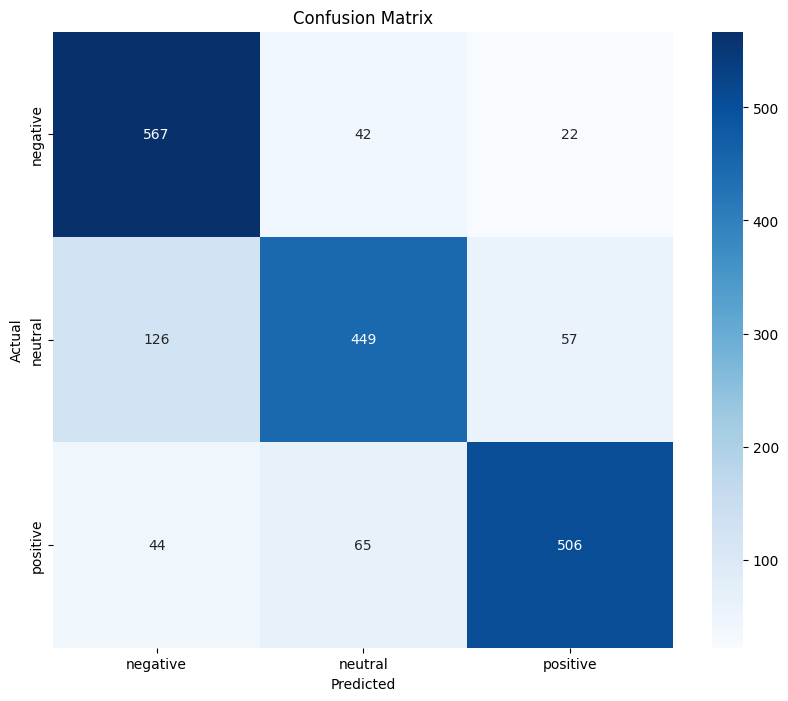


Classification Report:
              precision    recall  f1-score   support

    negative     0.7693    0.8986    0.8289       631
     neutral     0.8076    0.7104    0.7559       632
    positive     0.8650    0.8228    0.8433       615

    accuracy                         0.8104      1878
   macro avg     0.8139    0.8106    0.8094      1878
weighted avg     0.8135    0.8104    0.8091      1878



In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from torch.optim.lr_scheduler import CosineAnnealingLR
from imblearn.over_sampling import SMOTE

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('wordnet')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Enhanced text preprocessing
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Lemmatization and remove short words
    words = [lemmatizer.lemmatize(word) for word in words if len(word) > 2]
    return ' '.join(words)

# Load and preprocess data
df = pd.read_csv('data.csv')  # Replace with your dataset
df['cleaned_text'] = df['Sentence'].apply(preprocess_text)

# Label encoding
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['Sentiment'].map(label_map)

# TF-IDF Vectorization with more features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['label'].values

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Custom Dataset
class TextDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.features[idx]), torch.LongTensor([self.labels[idx]])

# Create DataLoaders
train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Enhanced LSTM Model with Attention
class AttentionLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.5):
        super(AttentionLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Bidirectional LSTM
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                           batch_first=True, bidirectional=True, dropout=dropout_rate)

        # Attention mechanism
        self.attention = nn.Sequential(
            nn.Linear(hidden_size*2, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, 1),
            nn.Softmax(dim=1)
        )

        # Classifier
        self.fc = nn.Linear(hidden_size*2, num_classes)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        # Reshape input for LSTM (batch_size, seq_len=1, input_size)
        x = x.unsqueeze(1)

        # Initialize hidden states
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device)

        # LSTM forward pass
        lstm_out, _ = self.lstm(x, (h0, c0))  # (batch_size, seq_len, hidden_size*2)

        # Attention weights
        attention_weights = self.attention(lstm_out)  # (batch_size, seq_len, 1)

        # Context vector
        context_vector = torch.sum(attention_weights * lstm_out, dim=1)  # (batch_size, hidden_size*2)

        # Classification
        out = self.dropout(context_vector)
        out = self.fc(out)
        return out

# Model parameters
input_size = X_train.shape[1]
hidden_size = 512
num_layers = 2
num_classes = 3
dropout_rate = 0.5

# Initialize model
model = AttentionLSTM(input_size, hidden_size, num_layers, num_classes, dropout_rate).to(device)

# Weighted loss for class imbalance
class_weights = torch.tensor([1.0, 1.2, 1.5]).to(device)  # Adjust based on your class distribution
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Optimizer with weight decay
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

# Learning rate scheduler
scheduler = CosineAnnealingLR(optimizer, T_max=10)

# Early stopping
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

early_stopping = EarlyStopping()

# Training loop
num_epochs = 20
best_accuracy = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)
    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.squeeze().to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        progress_bar.set_postfix({
            'loss': running_loss/(total/batch_size),
            'acc': 100.*correct/total
        })

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.squeeze().to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = 100.*val_correct/val_total

    # Update learning rate
    scheduler.step()

    # Early stopping check
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered")
        break

    # Save best model
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model.pth')

    print(f'Epoch {epoch+1}: Loss: {running_loss/len(train_loader):.4f}, '
          f'Acc: {100.*correct/total:.2f}%, '
          f'Val Loss: {val_loss:.4f}, '
          f'Val Acc: {val_accuracy:.2f}%')

# Load best model
model.load_state_dict(torch.load('best_model.pth'))

# Evaluation
model.eval()
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.squeeze().to(device)
        outputs = model(inputs)
        probs = F.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
roc_auc = roc_auc_score(all_labels, all_probs, multi_class='ovr')

print(f"\nFinal Test Accuracy: {accuracy:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"ROC AUC Score (OvR): {roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_map.keys(),
            yticklabels=label_map.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=label_map.keys(), digits=4))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Using device: cpu


Epoch 1: Loss: 0.8511, Acc: 55.03%, Val Loss: 0.5750, Val Acc: 76.57%


Epoch 2: Loss: 0.4209, Acc: 83.69%, Val Loss: 0.5340, Val Acc: 81.04%


Epoch 3: Loss: 0.2926, Acc: 88.96%, Val Loss: 0.5808, Val Acc: 80.56%


Epoch 4: Loss: 0.2302, Acc: 90.51%, Val Loss: 0.6531, Val Acc: 80.19%


Epoch 5: Loss: 0.1883, Acc: 91.84%, Val Loss: 0.7386, Val Acc: 80.94%


Epoch 6: Loss: 0.1624, Acc: 92.88%, Val Loss: 0.8235, Val Acc: 80.51%


Early stopping triggered

Final Test Accuracy: 0.8104
F1 Score (Weighted): 0.8091
ROC AUC Score (OvR): 0.9088



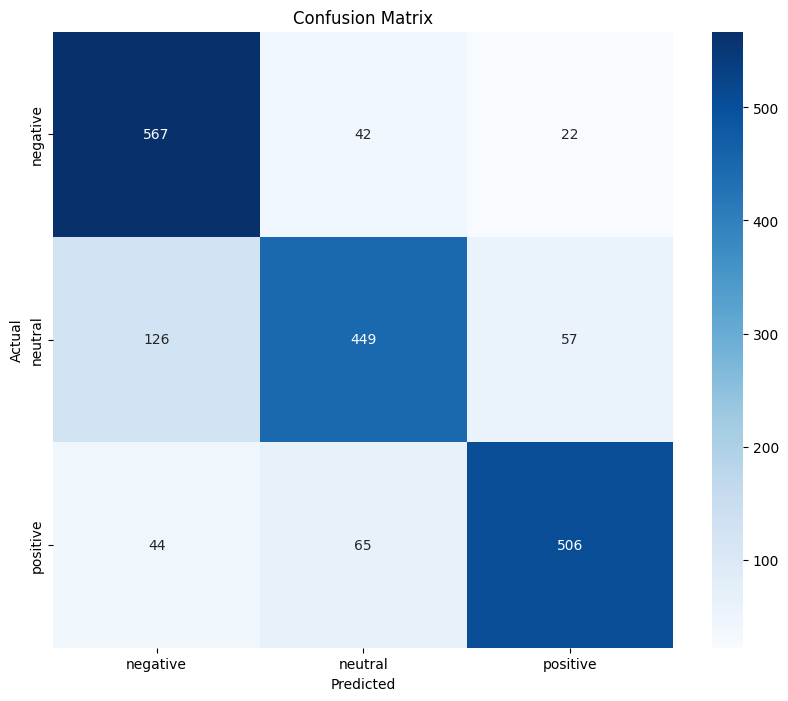


Classification Report:
              precision    recall  f1-score   support

    negative     0.7693    0.8986    0.8289       631
     neutral     0.8076    0.7104    0.7559       632
    positive     0.8650    0.8228    0.8433       615

    accuracy                         0.8104      1878
   macro avg     0.8139    0.8106    0.8094      1878
weighted avg     0.8135    0.8104    0.8091      1878



In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from torch.optim.lr_scheduler import CosineAnnealingLR
from imblearn.over_sampling import SMOTE

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('wordnet')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Enhanced text preprocessing
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Lemmatization and remove short words
    words = [lemmatizer.lemmatize(word) for word in words if len(word) > 2]
    return ' '.join(words)

# Load and preprocess data
df = pd.read_csv('data.csv')  # Replace with your dataset
df['cleaned_text'] = df['Sentence'].apply(preprocess_text)

# Label encoding
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['Sentiment'].map(label_map)

# TF-IDF Vectorization with more features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['label'].values

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Custom Dataset
class TextDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.features[idx]), torch.LongTensor([self.labels[idx]])

# Create DataLoaders
train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Enhanced LSTM Model with Attention
class AttentionLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.5):
        super(AttentionLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Bidirectional LSTM
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                           batch_first=True, bidirectional=True, dropout=dropout_rate)

        # Attention mechanism
        self.attention = nn.Sequential(
            nn.Linear(hidden_size*2, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, 1),
            nn.Softmax(dim=1)
        )

        # Classifier
        self.fc = nn.Linear(hidden_size*2, num_classes)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        # Reshape input for LSTM (batch_size, seq_len=1, input_size)
        x = x.unsqueeze(1)

        # Initialize hidden states
        h0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers*2, x.size(0), self.hidden_size).to(device)

        # LSTM forward pass
        lstm_out, _ = self.lstm(x, (h0, c0))  # (batch_size, seq_len, hidden_size*2)

        # Attention weights
        attention_weights = self.attention(lstm_out)  # (batch_size, seq_len, 1)

        # Context vector
        context_vector = torch.sum(attention_weights * lstm_out, dim=1)  # (batch_size, hidden_size*2)

        # Classification
        out = self.dropout(context_vector)
        out = self.fc(out)
        return out

# Model parameters
input_size = X_train.shape[1]
hidden_size = 512
num_layers = 2
num_classes = 3
dropout_rate = 0.5

# Initialize model
model = AttentionLSTM(input_size, hidden_size, num_layers, num_classes, dropout_rate).to(device)

# Weighted loss for class imbalance
class_weights = torch.tensor([1.0, 1.2, 1.5]).to(device)  # Adjust based on your class distribution
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Optimizer with weight decay
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

# Learning rate scheduler
scheduler = CosineAnnealingLR(optimizer, T_max=10)

# Early stopping
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

early_stopping = EarlyStopping()

# Training loop
num_epochs = 20
best_accuracy = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)
    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.squeeze().to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        progress_bar.set_postfix({
            'loss': running_loss/(total/batch_size),
            'acc': 100.*correct/total
        })

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.squeeze().to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = 100.*val_correct/val_total

    # Update learning rate
    scheduler.step()

    # Early stopping check
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered")
        break

    # Save best model
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model.pth')

    print(f'Epoch {epoch+1}: Loss: {running_loss/len(train_loader):.4f}, '
          f'Acc: {100.*correct/total:.2f}%, '
          f'Val Loss: {val_loss:.4f}, '
          f'Val Acc: {val_accuracy:.2f}%')

# Load best model
model.load_state_dict(torch.load('best_model.pth'))

# Evaluation
model.eval()
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.squeeze().to(device)
        outputs = model(inputs)
        probs = F.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
roc_auc = roc_auc_score(all_labels, all_probs, multi_class='ovr')

print(f"\nFinal Test Accuracy: {accuracy:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")
print(f"ROC AUC Score (OvR): {roc_auc:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_map.keys(),
            yticklabels=label_map.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=label_map.keys(), digits=4))

In [ ]:
# First, ensure all required NLTK resources are downloaded
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Open Multilingual WordNet (required for lemmatization)
nltk.download('punkt_tab')  # Additional punkt tables

# Now proceed with the rest of your code
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from torch.optim.lr_scheduler import CosineAnnealingLR
from imblearn.over_sampling import SMOTE

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Enhanced text preprocessing
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Lemmatization and remove short words
    words = [lemmatizer.lemmatize(word) for word in words if len(word) > 2]
    return ' '.join(words)

# Load and preprocess data
try:
    df = pd.read_csv('data.csv')  # Replace with your dataset
    df['cleaned_text'] = df['Sentence'].apply(preprocess_text)
except Exception as e:
    print(f"Error during preprocessing: {e}")
    # Check if NLTK resources are properly installed
    try:
        word_tokenize("test")  # Simple test of tokenizer
        lemmatizer.lemmatize("test")  # Simple test of lemmatizer
    except LookupError as le:
        print(f"NLTK resource error: {le}")
        print("Please ensure all NLTK resources are downloaded:")
        print("Run: nltk.download(['punkt', 'wordnet', 'omw-1.4', 'punkt_tab'])")
    raise

# Rest of your code continues...

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Using device: cpu


roBERTa

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os

filename = "data.csv"

df = pd.read_csv(filename,
                 encoding="utf-8", encoding_errors="replace")

df.columns = ["text", "sentiment"]
df.head(10)

,text,sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [ ]:
def color_sentiment(val):
    """Colors the sentiment column based on the sentiment."""
    if val == 'positive':
        color = 'lightgreen'
    elif val == 'negative':
        color = 'lightcoral'
    else:  # neutral
        color = 'lightblue'
    return f'background-color: {color}'

# Style the DataFrame
styled_df = df.head(10).style.applymap(color_sentiment, subset=['sentiment'])
# Display the styled DataFrame
styled_df

,text,sentiment
0,"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real possibility",negative
2,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",positive
3,"According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .",neutral
4,"The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .",neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder Skepticism,negative
7,"SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimates its results to remain at loss for the full year .",negative
8,Kone 's net sales rose by some 14 % year-on-year in the first nine months of 2008 .,positive
9,"The Stockmann department store will have a total floor space of over 8,000 square metres and Stockmann 's investment in the project will have a price tag of about EUR 12 million .",neutral


In [ ]:
import pandas as pd
import numpy as np

def clean_sentiment_data(df):
    """
    Perform basic cleaning on sentiment analysis dataset

    Parameters:
    df (pandas.DataFrame): Input DataFrame with 'text' and 'sentiment' columns

    Returns:
    pandas.DataFrame: Cleaned DataFrame
    """
    # Create a copy to avoid modifying original data
    cleaned_df = df.copy()

    # 1. Remove any duplicate rows
    cleaned_df = cleaned_df.drop_duplicates()

    # 2. Remove any rows with missing values
    cleaned_df = cleaned_df.dropna()

    # 3. Strip whitespace from text column
    cleaned_df['text'] = cleaned_df['text'].str.strip()

    # 4. Convert sentiment to lowercase for consistency
    cleaned_df['sentiment'] = cleaned_df['sentiment'].str.lower()

    # 5. Remove rows where text is empty after stripping
    cleaned_df = cleaned_df[cleaned_df['text'].str.len() > 0]

    # 6. Reset index after cleaning
    cleaned_df = cleaned_df.reset_index(drop=True)

    return cleaned_df

# Example usage:
cleaned_data = clean_sentiment_data(df)
display(cleaned_data.shape)
cleaned_data.head()

(5836, 2)

,text,sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


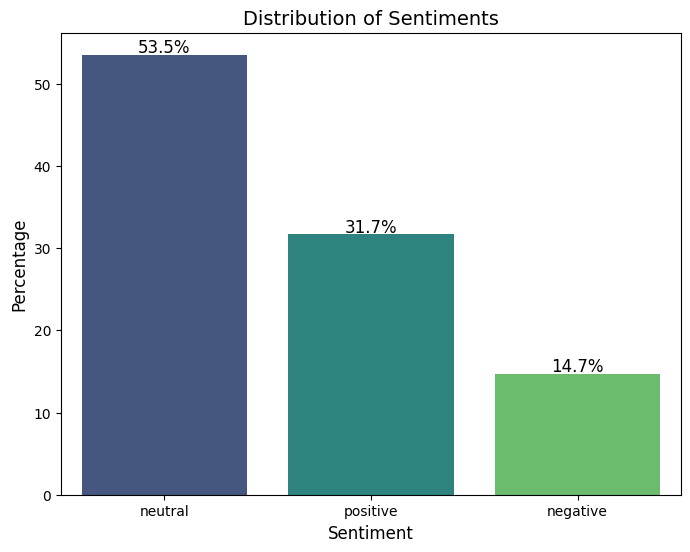

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = cleaned_data['sentiment'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Add percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
plt.title("Distribution of Sentiments", fontsize=14)
plt.show()

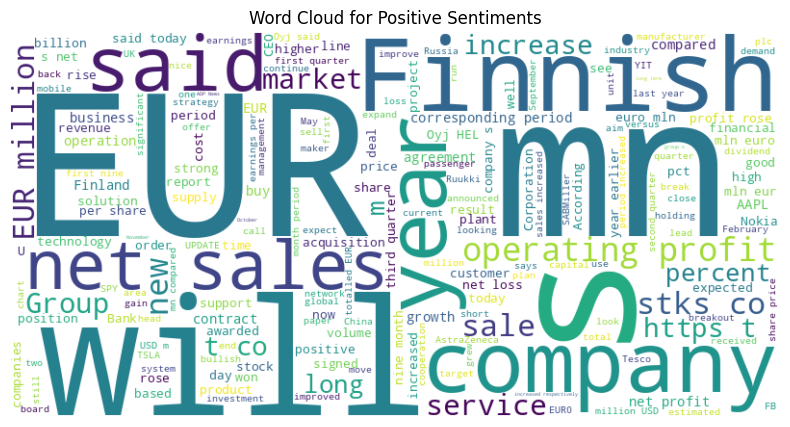

In [ ]:
# Filter for positive sentiments

from wordcloud import WordCloud, STOPWORDS
positive_reviews = cleaned_data[cleaned_data['sentiment'] == 'positive']

# Combine all positive reviews into a single string
positive_text = " ".join(positive_reviews['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

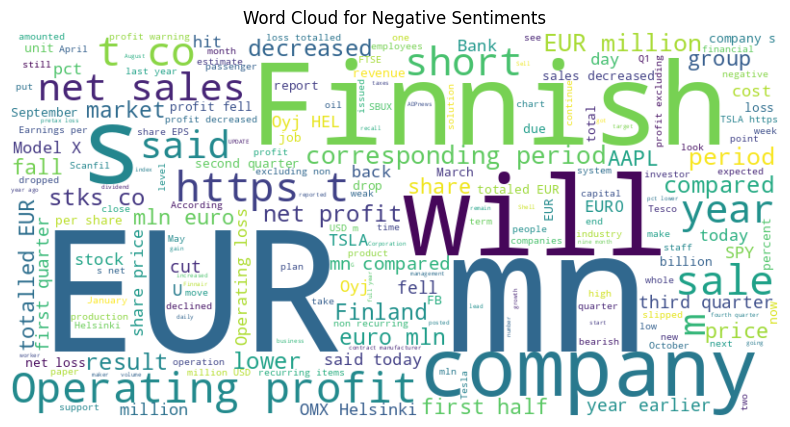

In [ ]:
# Filter for negative sentiments
negative_reviews = cleaned_data[cleaned_data['sentiment'] == 'negative']

# Combine all negative reviews into a single string
negative_text = " ".join(negative_reviews['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

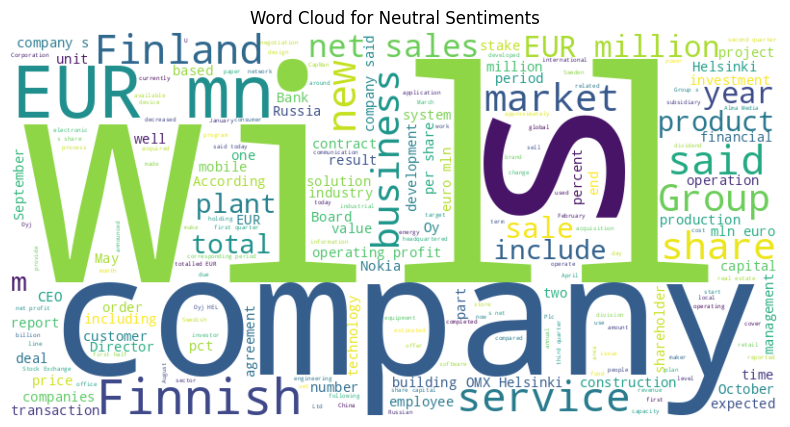

In [ ]:
# Filter for neutral sentiments
neutral_reviews = cleaned_data[cleaned_data['sentiment'] == 'neutral']

# Combine all neutral reviews into a single string
neutral_text = " ".join(neutral_reviews['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(neutral_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiments')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def convert_to_lowercase(df):
    """Step 1: Convert text to lowercase"""
    df['text_lower'] = df['text'].str.lower()
    return df

df = convert_to_lowercase(cleaned_data)
df.head()

,text,sentiment,text_lower
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...


In [ ]:
def remove_special_characters(df):
    """Step 2: Remove special characters and numbers"""
    df['text_clean'] = df['text_lower'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
    return df

df = remove_special_characters(df)
df.head()

,text,sentiment,text_lower,text_clean
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...


In [ ]:
def remove_urls(df):
    """Step 3: Remove URLs"""
    df['text_no_urls'] = df['text_clean'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))
    return df

df = remove_urls(df)
df.head()

,text,sentiment,text_lower,text_clean,text_no_urls
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...


In [ ]:
def remove_extra_whitespace(df):
    """Step 4: Remove extra whitespace"""
    df['text_stripped'] = df['text_no_urls'].apply(lambda x: ' '.join(x.split()))
    return df

df = remove_extra_whitespace(df)
df.head()

,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...


In [ ]:
import nltk
nltk.download('punkt_tab')
import nltk

nltk.download('wordnet')

def tokenize_text(df):
    """Step 5: Tokenization"""
    df['tokens'] = df['text_stripped'].apply(word_tokenize)
    return df

df = tokenize_text(df)
df.head()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n..."
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ..."
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r..."


In [ ]:
import nltk
from nltk.corpus import wordnet  # Import wordnet directly for efficiency

def tokenize_text(df):
    """Step 5: Tokenization"""
    df['tokens'] = df['text_stripped'].apply(nltk.word_tokenize)  # Use nltk.word_tokenize
    return df

def lemmatize_text(df):
    """Step 7: Lemmatization (after ensuring WordNet corpus is downloaded)"""
    if not nltk.data.path.exists('corpora/wordnet'):
        print("WordNet corpus not found. Downloading...")
        nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    df['lemmatized'] = df['tokens_no_stop'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    return df

In [ ]:
def remove_stopwords(df):
    """Step 6: Remove stopwords"""
    stop_words = set(stopwords.words('english'))
    df['tokens_no_stop'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
    return df

df = remove_stopwords(df)
df.head()

,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[esi, lows, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double..."
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,..."
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, perce..."


In [ ]:
def lemmatize_text(df):
#     """Step 7: Lemmatization"""
     lemmatizer = WordNetLemmatizer()
     df['lemmatized'] = df['tokens_no_stop'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
     return df
#
df = lemmatize_text(df)
df.head()

,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop,lemmatized
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ..."
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[esi, lows, bk, real, possibility]","[esi, low, bk, real, possibility]"
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double...","[last, quarter, componenta, net, sale, doubled..."
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,...","[according, finnishrussian, chamber, commerce,..."
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, perce...","[swedish, buyout, firm, sold, remaining, perce..."


In [ ]:
 def join_tokens(df):
#     """Step 8: Join tokens back to text"""
     df['processed_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))
     return df
#
#
 df = join_tokens(df)
 df.head()

,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop,lemmatized,processed_text
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ...",geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[esi, lows, bk, real, possibility]","[esi, low, bk, real, possibility]",esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double...","[last, quarter, componenta, net, sale, doubled...",last quarter componenta net sale doubled eurm ...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,...","[according, finnishrussian, chamber, commerce,...",according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, perce...","[swedish, buyout, firm, sold, remaining, perce...",swedish buyout firm sold remaining percent sta...


In [ ]:
def encode_labels(df):
    """Step 9: Encode sentiment labels"""
    le = LabelEncoder()
    df['sentiment_encoded'] = le.fit_transform(df['sentiment'])
    return df, le

df, label_encoder = encode_labels(df)
df.head()

,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop,lemmatized,processed_text,sentiment_encoded
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ...",geosolutions technology leverage benefon gps s...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[esi, lows, bk, real, possibility]","[esi, low, bk, real, possibility]",esi low bk real possibility,0
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double...","[last, quarter, componenta, net, sale, doubled...",last quarter componenta net sale doubled eurm ...,2
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,...","[according, finnishrussian, chamber, commerce,...",according finnishrussian chamber commerce majo...,1
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, perce...","[swedish, buyout, firm, sold, remaining, perce...",swedish buyout firm sold remaining percent sta...,1


In [ ]:
def create_tfidf(df, max_features=5000):
    """Step 10: TF-IDF Vectorization"""
    tfidf = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = tfidf.fit_transform(df['processed_text'])
    return tfidf_matrix, tfidf

In [ ]:
tfidf_matrix, tfidf_vectorizer = create_tfidf(df)

In [ ]:
df = convert_to_lowercase(cleaned_data)
df = remove_special_characters(df)
df = remove_urls(df)
df.head()

,text,sentiment,text_lower,text_clean,text_no_urls,text_stripped,tokens,tokens_no_stop,lemmatized,processed_text,sentiment_encoded
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,the geosolutions technology will leverage bene...,"[the, geosolutions, technology, will, leverage...","[geosolutions, technology, leverage, benefon, ...","[geosolutions, technology, leverage, benefon, ...",geosolutions technology leverage benefon gps s...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po...",esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,esi on lows down to bk a real possibility,"[esi, on, lows, down, to, bk, a, real, possibi...","[esi, lows, bk, real, possibility]","[esi, low, bk, real, possibility]",esi low bk real possibility,0
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,for the last quarter of componenta s net sal...,for the last quarter of componenta s net sales...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double...","[last, quarter, componenta, net, sale, doubled...",last quarter componenta net sale doubled eurm ...,2
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,according to the finnishrussian chamber of com...,"[according, to, the, finnishrussian, chamber, ...","[according, finnishrussian, chamber, commerce,...","[according, finnishrussian, chamber, commerce,...",according finnishrussian chamber commerce majo...,1
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...,"[the, swedish, buyout, firm, has, sold, its, r...","[swedish, buyout, firm, sold, remaining, perce...","[swedish, buyout, firm, sold, remaining, perce...",swedish buyout firm sold remaining percent sta...,1


In [ ]:
%%time

import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import (
    RobertaTokenizer,
    RobertaForSequenceClassification,
    get_linear_schedule_with_warmup
)
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import random

# Set random seeds for reproducibility
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(42)

def create_balanced_dataset(df, n_samples=5000):
    """Create balanced dataset with equal class distribution"""
    sentiment_map = {'negative': 0, 'neutral': 1, 'positive': 2}
    df['label'] = df['sentiment'].map(sentiment_map)

    balanced_dfs = []
    samples_per_class = n_samples // 3

    for label in range(3):
        class_df = df[df['label'] == label]
        balanced_dfs.append(
            class_df.sample(
                n=samples_per_class,
                replace=len(class_df) < samples_per_class,
                random_state=42
            )
        )

    return pd.concat(balanced_dfs).sample(frac=1, random_state=42)

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            add_special_tokens=True,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
            return_token_type_ids=False
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

def train_model(df, num_epochs=3, batch_size=16, learning_rate=2e-5):
    # 1. Prepare Data
    print("Creating balanced dataset...")
    balanced_df = create_balanced_dataset(df)
    print("Class distribution:\n", balanced_df['label'].value_counts())

    train_df, test_df = train_test_split(
        balanced_df,
        test_size=0.2,
        random_state=42,
        stratify=balanced_df['label']
    )

    # 2. Initialize Tokenizer and Model
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    model = RobertaForSequenceClassification.from_pretrained(
        'roberta-base',
        num_labels=3
    )

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    # 3. Create DataLoaders
    train_dataset = SentimentDataset(
        train_df['text'].tolist(),
        train_df['label'].tolist(),
        tokenizer
    )

    test_dataset = SentimentDataset(
        test_df['text'].tolist(),
        test_df['label'].tolist(),
        tokenizer
    )

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # 4. Set Up Optimizer and Scheduler
    optimizer = AdamW(model.parameters(), lr=learning_rate)  # Removed correct_bias
    total_steps = len(train_loader) * num_epochs
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=total_steps
    )

    # 5. Training Loop
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch + 1}/{num_epochs}")
        model.train()
        total_loss = 0

        for batch in train_loader:
            optimizer.zero_grad()

            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()

        # Evaluation
        model.eval()
        predictions, true_labels = [], []

        with torch.no_grad():
            for batch in test_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                preds = torch.argmax(logits, dim=1)

                predictions.extend(preds.cpu().numpy())
                true_labels.extend(labels.cpu().numpy())

        # Calculate metrics
        accuracy = accuracy_score(true_labels, predictions)
        print(f"Train Loss: {total_loss/len(train_loader):.4f}")
        print(f"Test Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(
            true_labels,
            predictions,
            target_names=['Negative', 'Neutral', 'Positive']
        ))

    # Save model
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'tokenizer': tokenizer
    }, 'sentiment_model.pt')

    return model, tokenizer

def predict_sentiment(text, model, tokenizer, device):
    model.eval()
    encoding = tokenizer.encode_plus(
        text,
        max_length=128,
        add_special_tokens=True,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
        return_token_type_ids=False
    )

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1)
        pred = torch.argmax(probs).item()

    sentiment_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
    return sentiment_map[pred], probs[0][pred].item()

# Example usage
if __name__ == "__main__":
    # Assuming df is your DataFrame with 'text' and 'sentiment' columns
    print("Starting training...")
    model, tokenizer = train_model(df)

    # Test prediction
    test_text = "I really enjoyed this product!"
    sentiment, confidence = predict_sentiment(
        test_text,
        model,
        tokenizer,
        torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    )
    print(f"\nText: '{test_text}'")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2%})")

Starting training...
Creating balanced dataset...
Class distribution:
 label
0    1666
1    1666
2    1666
Name: count, dtype: int64


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/3
Train Loss: 0.6059
Test Accuracy: 0.8400

Classification Report:
              precision    recall  f1-score   support

    Negative       0.80      0.90      0.85       333
     Neutral       0.83      0.76      0.79       333
    Positive       0.89      0.86      0.88       334

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000


Epoch 2/3
Train Loss: 0.3331
Test Accuracy: 0.8510

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.98      0.87       333
     Neutral       0.95      0.63      0.76       333
    Positive       0.86      0.95      0.90       334

    accuracy                           0.85      1000
   macro avg       0.87      0.85      0.84      1000
weighted avg       0.87      0.85      0.84      1000


Epoch 3/3
Train Loss: 0.2483
Test Accuracy: 0.8640

Classification Report:
          